## 대표적인 이산형 확률분포

#### 비모수적 기법 : 모집단의 확률분포에 어떠한 가정도 하지 않음
#### 모수적 기법 : 모집단이 특정 확률분포를 따를것이라 가정 => 기댓값이나 분산을 결정하는 소수의 파라미터를 추측

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

#### 
#### 그래프의 선의 종류

In [4]:
linestyles = ['-', '--', ':']

#### 기댓값과 분산에 대한 함수

In [6]:
def E(X, g = lambda x : x):
    x_set, f = X
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [7]:
def V(X, g = lambda x : x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k) - mean)**2 * f(x_k) for x_k in x_set])

#### 확률변수가 확률의 성질을 만족하는지 확인하고, 기댓값과 분산을 계산

In [8]:
def check_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    assert np.all(prob >= 0), 'minus probability'
    prob_sum = np.round(np.sum(prob), 6)
    assert prob_sum == 1, f'sum of probability{prob_sum}'
    print(f'expected value {E(X):.4}')
    print(f'variance {(V(X)):.4}')

#### 확률변수의 확률함수와 기댓값을 그림

In [42]:
def plot_prob(X):
    x_set, f = X
    prob = np.array([f(x_k) for x_k in x_set])
    
    fig = plt.figure(figsize = (10, 6))
    ax = fig.add_subplot(111)
    
    ax.bar(x_set, prob, label = 'prob', color = 'green')
    ax.vlines(E(X), 0, 1, label = 'mean')
    
    ax.set_xticks(np.append(x_set, E(X)))
    ax.set_ylim(0, prob.max() * 1.2)
    ax.legend()
    
    plt.show()

### 
## 베르누이 분포 : $Bern(p)$
- 확률변수가 취할 수 있는 값이 0과 1밖에 없음
- 베르누이 시행 : 베르누이 분포를 따르는 확률변수의 시행 (1 : 성공 / 0 : 실패)
- $p$ : 성공의 확률 / $1 - p$ : 실패의 확률 $(0 \leq p \leq 1)$

|  |  |
| -- | -- |
| **파라미터** | p |
| **취할 수 있는 값** | \{0, 1\} |
| **확률함수** | $$p^x {(1-p)}^{1-x}$$ |
| **기댓값** | p |
| **분산** | p(1-p) |
| **scipy.stats** | bernoulli(p) |

#### 베르누이 분포의 확률함수

### $f(x) = $
$\begin{cases}
p^x (1-p)^{1-x}\;\;\; (x \in \{0, 1\})\\
0\;\;\; (otherwise)
\end{cases}$

### 
#### 동전을 던져 앞면이 나올 확률
### $X \sim Bern({1 \over 2})$
### $P(X = 1) = ({1 \over 2})^1 \times (1 - {1 \over 2})^{1 - 1} = {1 \over 2}$

#### 주사위를 한 번 굴려 6이 나오지 않을 확률
### $P(X = 0) = ({1 \over 6})^0 \times (1 - {1 \over 6})^(1 - 0) = {5 \over 6}$

### 
#### 베르누이 분포의 기댓값과 분산
### $E(X) = p \;\;\;\;\;\;\; V(X) = p(1-p$ 

In [25]:
def Bern(p):
    x_set = np.array([0, 1])
    def f(x):
        if x in x_set:
            return p ** x * (1-p) ** (1 - x)
        else:
            return 0
    return x_set, f

In [26]:
p = 0.3
X = Bern(p)

In [27]:
check_prob(X)

expected value 0.3
variance 0.21


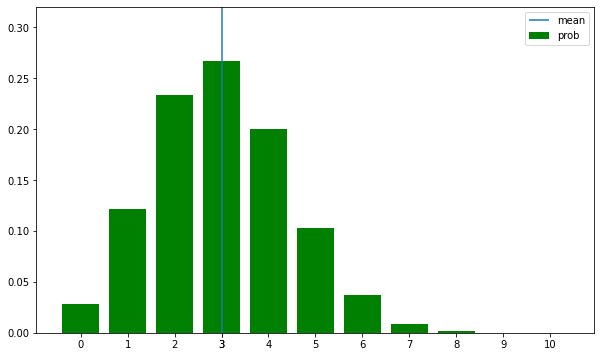

In [43]:
plot_prob(X)

### 
### scipy.stats
### ```stats.bernoulli(p)``` : 베르누이 분포를 따르는 rv_frozen 객체를 반환 (scipy.stats의 확률변수)

In [29]:
from scipy import stats

In [30]:
rv = stats.bernoulli(p)

### ```.pmf()``` : 확률함수 계산, 0과 1을 각각 넘겨주면 그 값을 취하는 확률이 반환

In [31]:
rv.pmf(0), rv.pmf(1)

(0.700, 0.300)

In [32]:
rv.pmf([0, 1])

array([0.7, 0.3])

### ```.cdf()``` : 누적밀도함수 계산

In [33]:
rv.cdf([0, 1])

array([0.7, 1. ])

### ```.mean()```, ```.var()```

In [34]:
rv.mean(), rv.var()

(0.300, 0.210)

### 
## 이항분포 : 성공확률이 $p$인 베르누이 시행을 n번 시행 했을 때의 성공 횟수가 따르는 분포
- 확률변수가 취할 수 있는 값 : $\{0, 1 \}$
- $p$ : 성공확률 / $n$ : 시행횟수    $ \;\;\; (0 \leq p \leq 1$)

|  |  |
| -- | -- |
| **파라미터** | n, p |
| **취할 수 있는 값** | \{0, 1, ..., n\} |
| **확률함수** | $${n \choose x}p^x (1-p)^{n-x}$$ |
| **기댓값** | np |
| **분산** | np(1-p) |
| **scipy.stats** | binom(p) |

#### 
#### 이항분포의 확률함수

### $f(x) =$
$\begin{cases}
{n \choose x}p^x (1-p)^{n-x},\;\;if\; (x \in \{0, 1, ..., n\})\\
0,\;\;if \; (otherwise)
\end{cases} \;\;\;\;\; ({n \choose x} = {n! \over {x!(n-x)!}})$

### 
#### 동전을 10번 던져 3번 앞면이 나올 확률
### $X \sim Bin(10, {1 \over 2})$
### $P(X = 3) = {10 \choose 3}({1 \over 2})^3 \times (1 - {1 \over 2})^{10 - 3} = {15 \over 128}$

#### 주사위를 4번 굴려 6이 나오지 않을 확률
### $P(X = 0) = {4 \choose 0}({1 \over 6})^0 \times (1 - {1 \over 6})^(4 - 0) = {625 \over 1296}$

### 
#### 이항분포의 기댓값과 분산
### $E(X) = np \;\;\;\;\;\;\; V(X) = np(1-p$ 

In [48]:
def Bin(n, p):
    x_set = np.arange(n + 1)
    def f(x):
        if x in x_set:
            return comb(n, x) * p**x * (1 - p)**(n - x)
        else:
            return 0
    return x_set, f

In [49]:
n = 10
p = 0.3
X = Bin(n, p)
X

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <function __main__.Bin.<locals>.f(x)>)

#### $Bin(10, 0.3)$

In [37]:
check_prob(X)

expected value 3.0
variance 2.1


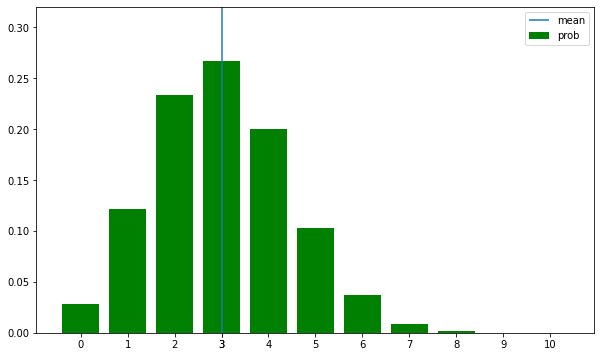

In [44]:
plot_prob(X)

### 
### scipy.stats
### ```stats.binom(n, p)```

In [45]:
x_set = np.arange(n + 1)
x_set

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

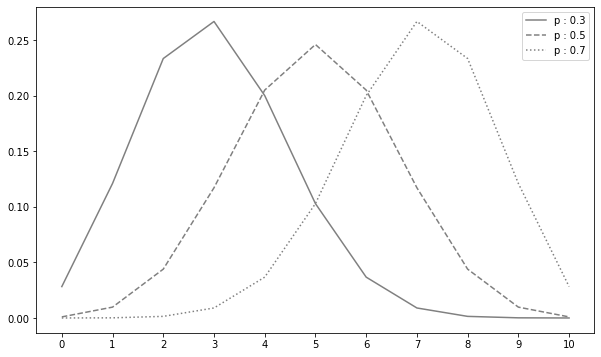

In [47]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

for p, ls in zip([0.3, 0.5, 0.7], linestyles):
    rv = stats.binom(n, p)
    ax.plot(x_set, rv.pmf(x_set),
            label = f'p : {bp}', ls = ls, color = 'gray')
    
ax.set_xticks(x_set)
ax.legend()

plt.show()

- p가 커질수록, 정상이 되는 값이 증가
- $p = 0.5$일 때 좌우대칭 형태로 분포
- **$p = 0.3$과 $p = 0.7$이 대칭 관계에 있음**

## 
## 기하분포 : 베르누이 시행에서 처음 성공할 대까지 반복한 시행 횟수가 다르는 분포
- 첫 번째 성공 시 연달아 실패할 수도 있기에, 확률변수가 취할 수 잇는 값은 1 이상인 정수 전체 $\{1, 2, ... \}$
- $p$ : 성공확률  $ \;\;\; (0 \leq p \leq 1$)


|  |  |
| -- | -- |
| **파라미터** | p |
| **취할 수 있는 값** | \{1,2, 3 ...\} |
| **확률함수** | $$(1-p)^{x-1} p$$ |
| **기댓값** | ${1 \over p}$ |
| **분산** | ${{(1-p)} \over p^2}$ |
| **scipy.stats** | geom(p) |

#### 
#### 기하분포의 확률함수

### $f(x) =$
$\begin{cases}
(1-p)^{x-1}p \;\;if\; (x \in \{1,2, 3 ...\})\\
0,\;\;if \; (otherwise)
\end{cases}$

### 
#### 동전을 다섯 번째 던졌을 때 처음으로 앞면이 나오는 확률
### $X \sim Ge({1 \over 2})$
### $P(X = 5) = (1 - {1 \over 2})^2 \times ({1 \over 2}) = {1 \over 32}$

#### 주사위를 세 번째 굴렸을 때 처음으로 6이 낭는 확률
### $X \sim Ge({1 \over 6})$
### $P(X = 3) = (1 - {1 \over 6})^2 \times ({1 \over 6}) = {25 \over 216}$

### 
#### 기하분포의 기댓값과 분산
### $E(X) = {1 \over p} \;\;\;\;\;\;\; V(X) = {{(1-p)} \over {p^2}}$

In [50]:
def Ge(p):
    x_set = np.arange(1, 30)
    def f(x):
        if x in x_set:
            return p * (1-p) ** (x-1)
        else:
            return 0
    return x_set, f

In [51]:
p = 0.5
X = Ge(p)
X

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <function __main__.Ge.<locals>.f(x)>)

In [52]:
check_prob(X)

expected value 2.0
variance 2.0


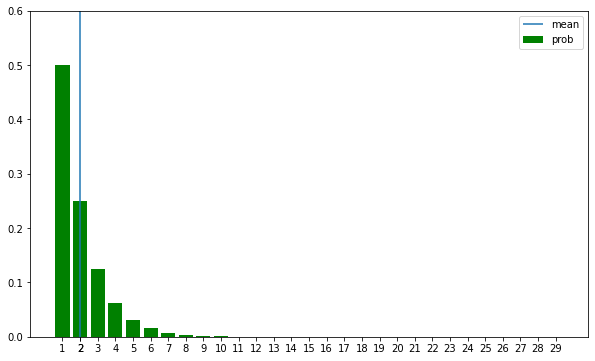

In [53]:
plot_prob(X)

- 확률변수의 값이 커질수록 확률은 지수적으로 감소
- 11이상인 값을 취하는 확률은 거의 0이 됨

### 
### ```stats.geom(p)```

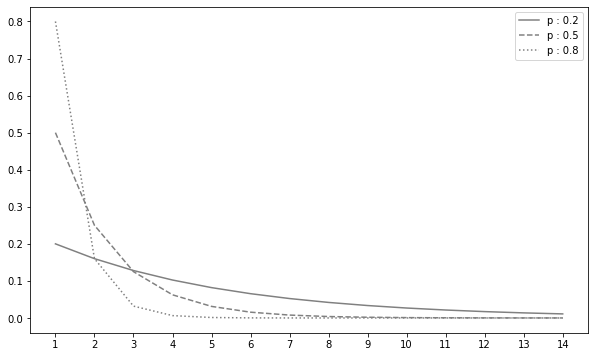

In [55]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

x_set = np.arange(1, 15)
for p, ls in zip([0.2, 0.5, 0.8], linestyles):
    rv = stats.geom(p)
    ax.plot(x_set, rv.pmf(x_set),
            label = f'p : {p}', ls = ls, color = 'gray')

ax.set_xticks(x_set)
ax.legend()

plt.show()

- **파라미터 $p$가 무엇이든지, 값이 커질수록 확률이 지수적으로 감소하는 분포**

## 
## 포아송분포 : 임의의 사건이 단위 시간당 발생하는 건수가 따르는 확률 분포
- 발생하는 건수의 확률분포이므로, 확률변수가 취할 수 잇는 값은 $\{0, 1, 2, ... \}$
- $\lambda$ : 포아송 분포의 파라미터 $\;\; (\lambda > 0)$

|  |  |
| -- | -- |
| **파라미터** | \lambda |
| **취할 수 있는 값** | \{0, 1,2, ...\} |
| **확률함수** | $${{\lambda^x} \over {x!}} e^{-\lambda}$$ |
| **기댓값** | $\lambda$ |
| **분산** | $\lambda$ |
| **scipy.stats** | poisson(p) |

#### 
#### 포아송분포의 확률함수

### $f(x) =$
$\begin{cases}
{{\lambda^x} \over {x!}} e^{-\lambda} \;\;if\; (x \in \{0, 1,2, 3 ...\})\\
0,\;\;if \; (otherwise)
\end{cases}$

### 
#### 하루에 평균 2건의 교통사고가 발생하는 지역에서, 하루에 교통사고가 한 건도 일어나지 않을 확률
### $X \sim Poi(2)$
### $P(X = 0) = {{2^0} \over {0!}} e^{-2}$

#### 한 시간에 평균 10번 액세스 하는 사이트에서, 한 시간에 정확하게 15건 발생할 확률
### $X \sim Poi(10)$
### $P(X = 15) = {{10^16} \over {15!}} e^{-10}$

### 
#### 기하분포의 기댓값과 분산
### $E(X) = \lambda \;\;\;\;\;\;\; V(X) = \lambda$

### 
### ```scipy.special```
### ```factorial(x)``` : $x!$

In [60]:
from scipy.special import factorial

In [61]:
def Poi(lam):
    x_set = np.arange(20)
    def f(x):
        if x in x_set:
            return np.power(lam, x) / factorial(x) * np.exp(-lam)
        else:
            return 0
    return x_set, f

In [57]:
lam = 3
X = Poi(lam)

In [58]:
check_prob(X)

expected value 3.0
variance 3.0


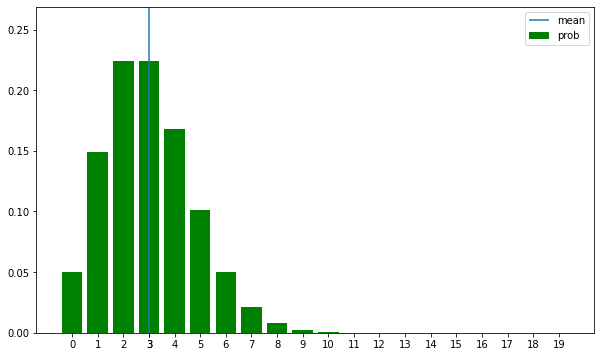

In [64]:
plot_prob(X)

- **기댓값 $\lambda$가 정상이 되는 산의 형태**

### 
### ```stats.poisson(lambda)```

In [62]:
x_set = np.arange(20)

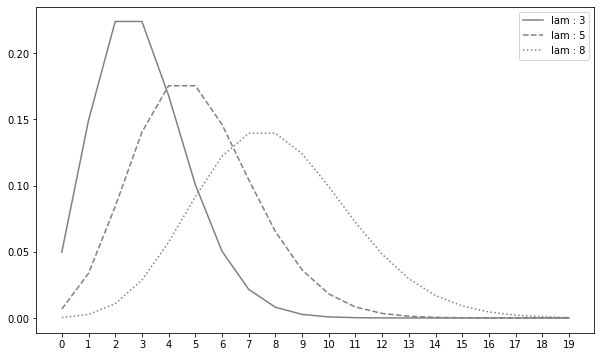

In [63]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111)

for lam, ls in zip([3, 5, 8], linestyles):
    rv = stats.poisson(lam)
    ax.plot(x_set, rv.pmf(x_set),
            label=f'lam : {lam}', ls = ls, color = 'gray')

    ax.set_xticks(x_set)
ax.legend()

plt.show()

- **어떠한 파라미터라도 분포의 정상에는 $\lambda$가 있고, $\lambda$가 커질수록 경사면이 더욱 완만해짐**